In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize

from qiskit.quantum_info import random_statevector


from utility import *

In [2]:
#create_bell_pair(qc, a, b): coded in utility.py

def encode_message(qc, qubit, msg):
    if msg == "00":
        pass    # To send 00 we do nothing
    elif msg == "10":
        qc.x(qubit) # To send 10 we apply an X-gate
    elif msg == "01":
        qc.z(qubit) # To send 01 we apply a Z-gate
    elif msg == "11":
        qc.z(qubit) # To send 11, we apply a Z-gate
        qc.x(qubit) # followed by an X-gate
    else:
        print("Invalid Message: Sending '00'")

In [3]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

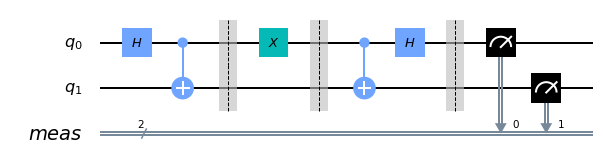

In [4]:
#put everything together
qc = QuantumCircuit(2)
create_bell_pair(qc, 0, 1)
qc.barrier() 
message = "10"
encode_message(qc, 0, message)
qc.barrier()
decode_message(qc, 0, 1)
qc.measure_all()
qc.draw(output = "mpl")

{'10': 1024}


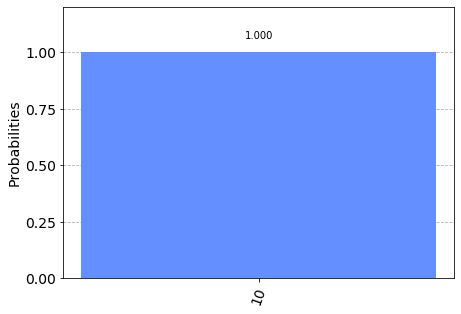

In [6]:
backend = Aer.get_backend('qasm_simulator')
res = execute(qc, backend, shots=1024).result()

measurement_result = res.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

In [7]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
job = execute(qc, backend=backend, shots=shots)

least busy backend:  ibmq_london


In [8]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


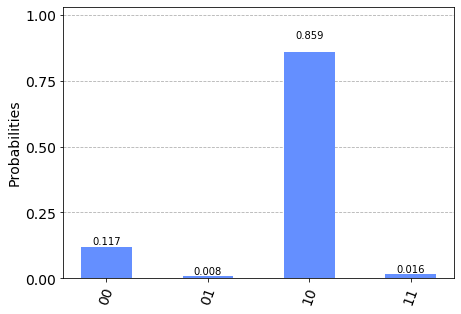

In [9]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

In [10]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)

Accuracy = 85.94%
